# Model Training and Testing using tensorflow keras

In [86]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

# Loading and Preprocessing

In [19]:
def load_images_and_labels(base_path):
    images = []
    labels = []
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))  # Resize to normalize image size
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            images.append(img)
            labels.append(int(folder))  # Assuming folder names are 0-9
    images = np.array(images) / 255.0  # Normalize pixel values
    images = images.reshape(-1, 64, 64, 1)  # Reshape for CNN input
    labels = to_categorical(labels, num_classes=10)  # One-hot encode labels
    return images, labels

# Path to your dataset
base_path = 'D:/UNO_CARD'
images, labels = load_images_and_labels(base_path)
print(len(images),len(labels))

17096 17096


#  create a model

In [20]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model

In [21]:
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
history = model.fit(images, labels, epochs=20, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/20
428/428 [==============================] - 30s 68ms/step - loss: 1.9316 - accuracy: 0.2572 - val_loss: 7.9720 - val_accuracy: 8.7719e-04
Epoch 2/20
428/428 [==============================] - 30s 69ms/step - loss: 1.2928 - accuracy: 0.5302 - val_loss: 11.7179 - val_accuracy: 0.0094
Epoch 3/20
428/428 [==============================] - 30s 70ms/step - loss: 0.8394 - accuracy: 0.6987 - val_loss: 14.6170 - val_accuracy: 0.0102
Epoch 4/20
428/428 [==============================] - 29s 69ms/step - loss: 0.6021 - accuracy: 0.7830 - val_loss: 17.9342 - val_accuracy: 0.0044
Epoch 5/20
428/428 [==============================] - 29s 68ms/step - loss: 0.4587 - accuracy: 0.8313 - val_loss: 17.8830 - val_accuracy: 0.0050
Epoch 6/20
428/428 [==============================] - 29s 68ms/step - loss: 0.3807 - accuracy: 0.8586 - val_loss: 19.9627 - val_accuracy: 0.0158
Epoch 7/20
428/428 [==============================] - 30s 69ms/step - loss: 0.3117 - accuracy: 0.8867 - val_loss: 22.8572 - val

# Testing model

In [23]:
test_base_path = 'D:/UNO_CARD'  # Update this path to where your test data is located
test_images, test_labels = load_images_and_labels(test_base_path)

In [24]:
# Load the model
model = load_model('best_model.h5')


In [25]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

535/535 [==============================] - 11s 20ms/step - loss: 4.0831 - accuracy: 0.7867
Test loss: 4.083126544952393
Test accuracy: 0.7866752743721008


In [26]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(test_labels, axis=1)

# Display some predictions
for i in range(10):  # Show first 10 predictions
    print(f"Predicted: {predicted_classes[i]}, Actual: {actual_classes[i]}")

535/535 [==============================] - 11s 17ms/step
Predicted: 4, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0


In [29]:
cm = confusion_matrix(actual_classes, predicted_classes)
print(cm)

report = classification_report(actual_classes, predicted_classes)
print(report)

[[1222   11    9    6    6    3    2    4    0    0]
 [   2 1720    9    4    2    2    0    6    0    0]
 [   6    9 1678    6    6    7    2    6    0    0]
 [  14    0    0 1700    0    0   13    0    0    0]
 [   1    0    2    7 1945    1    5    0    0    0]
 [   0    0    1    6    6 1660    8    3    0    0]
 [   3    3    0   10   21   25 1878   11    0    0]
 [   2   24    0   19   79    2   20 1646    0    0]
 [  85   52  159   91  243  440  263  231    0    0]
 [  74   77  280  198  301  387  174  198    0    0]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1263
           1       0.91      0.99      0.94      1745
           2       0.78      0.98      0.87      1720
           3       0.83      0.98      0.90      1727
           4       0.75      0.99      0.85      1961
           5       0.66      0.99      0.79      1684
           6       0.79      0.96      0.87      1951
           7       0.78      0.92   

C:\Users\MANISH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MANISH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MANISH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  Evaluation of model

In [31]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

535/535 [==============================] - 8s 15ms/step - loss: 4.0831 - accuracy: 0.7867
Test Loss: 4.083126544952393
Test Accuracy: 0.7866752743721008


In [32]:
# Predict the test set results
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(test_labels, axis=1)

535/535 [==============================] - 10s 18ms/step


In [33]:
# Generate the confusion matrix
cm = confusion_matrix(actual_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1222   11    9    6    6    3    2    4    0    0]
 [   2 1720    9    4    2    2    0    6    0    0]
 [   6    9 1678    6    6    7    2    6    0    0]
 [  14    0    0 1700    0    0   13    0    0    0]
 [   1    0    2    7 1945    1    5    0    0    0]
 [   0    0    1    6    6 1660    8    3    0    0]
 [   3    3    0   10   21   25 1878   11    0    0]
 [   2   24    0   19   79    2   20 1646    0    0]
 [  85   52  159   91  243  440  263  231    0    0]
 [  74   77  280  198  301  387  174  198    0    0]]


In [34]:
# Generate a classification report
report = classification_report(actual_classes, predicted_classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1263
           1       0.91      0.99      0.94      1745
           2       0.78      0.98      0.87      1720
           3       0.83      0.98      0.90      1727
           4       0.75      0.99      0.85      1961
           5       0.66      0.99      0.79      1684
           6       0.79      0.96      0.87      1951
           7       0.78      0.92      0.84      1792
           8       0.00      0.00      0.00      1564
           9       0.00      0.00      0.00      1689

    accuracy                           0.79     17096
   macro avg       0.64      0.78      0.70     17096
weighted avg       0.64      0.79      0.71     17096



C:\Users\MANISH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MANISH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MANISH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


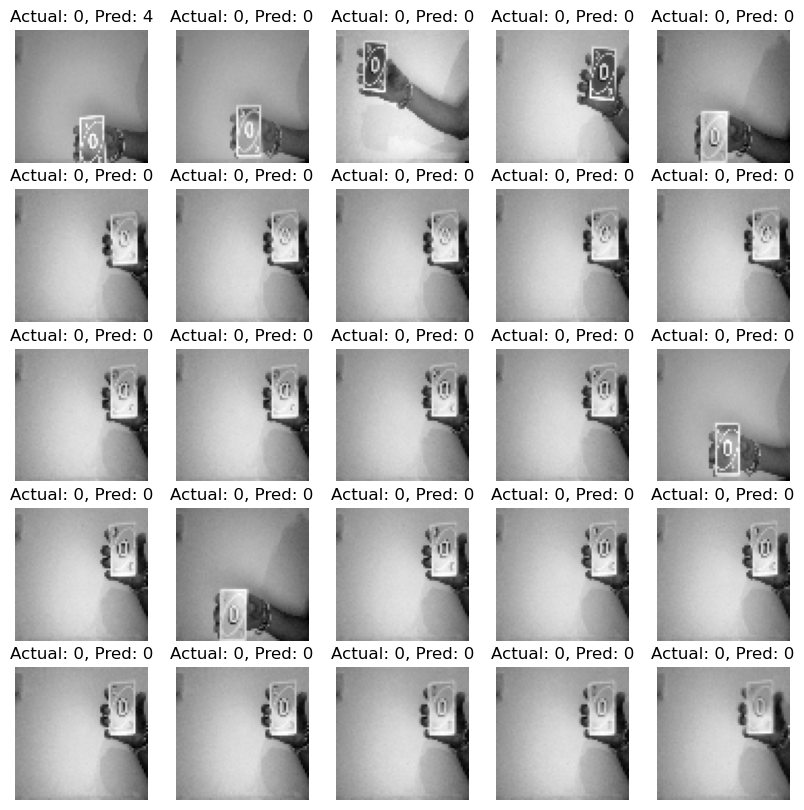

In [41]:
def plot_images(images, actuals, preds):
    plt.figure(figsize=(10, 10))
    for i in range(25):  # adjust this number based on how many images you want to show
        ax = plt.subplot(5, 5, i + 1)  # adjust the grid size accordingly
        plt.imshow(images[i].reshape(64, 64), cmap='gray')  # adjust the shape based on your actual image dimensions
        plt.title(f"Actual: {actuals[i]}, Pred: {preds[i]}")
        plt.axis('off')
    plt.show()

# Call the function with the appropriate arrays
plot_images(test_images, actual_classes, predicted_classes)

# Prediction on new image

In [50]:
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Resize the image to match the input size of the model (e.g., 64x64)
    img = cv2.resize(img, (64, 64))
    # Convert to grayscale if the model was trained on grayscale images
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Normalize pixel values to [0, 1]
    img = img / 255.0
    # Reshape the image to fit the model input (e.g., (1, 64, 64, 1) for a single grayscale image)
    img = img.reshape(1, 64, 64, 1)
    return img

In [51]:
model = load_model('best_model.h5')

In [52]:
def predict_image(model, image_path):
    # Preprocess the image
    processed_image = preprocess_image(image_path)
    # Predict the class
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction)
    return predicted_class

In [93]:
image_path = 'D:/UNO_CARD/9/110.png'
predicted_class = predict_image(model, image_path)
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 63ms/step
Predicted class: 4


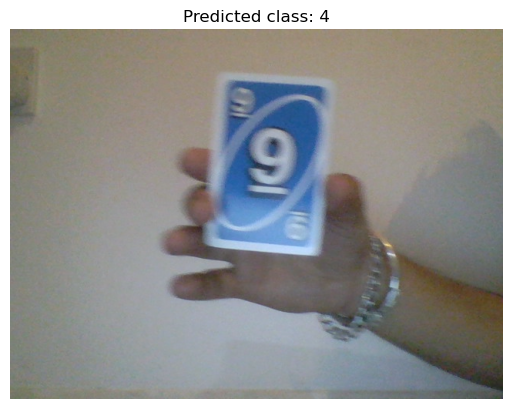

In [94]:
def display_image_with_prediction(image_path, predicted_class):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
    plt.imshow(img)
    plt.title(f"Predicted class: {predicted_class}")
    plt.axis('off')
    plt.show()

# Display the image with its prediction
display_image_with_prediction(image_path, predicted_class)

In [55]:
print(f'Probability that image is a dog is: {predicted_class} ')


Probability that image is a dog is: 2 


# COLOR DETECTION

#  Define the Function for Color Detection

In [73]:
def detect_hsv_color(image_path):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64, 64))  # Optional: Resize to reduce computation

    # Convert to HSV color space
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Histogram in HSV (focusing only on the hue channel for simplicity)
    # You might want to consider other channels depending on your specific needs
    hue_hist = cv2.calcHist([hsv_img], [0], None, [180], [0, 180])
    dominant_hue = np.argmax(hue_hist)
    print(dominant_hue)

    # Map the dominant hue to a color name
    color = "undefined"
    if dominant_hue < 30:
        color = "red"
    elif 50 <= dominant_hue < 60:
        color = "yellow"
    elif 80 <= dominant_hue < 150:
        color = "green"
    elif 200 <= dominant_hue < 250:
        color = "blue"
    else:
        color = "red"  # Wrapping around the hue circle

    return color

# Process Images for Color Detection

In [74]:
def process_images_for_color(base_path):
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            dominant_color = detect_hsv_color(file_path)
            print(f"{file}: Dominant Color - {dominant_color}")

base_path = 'D:/UNO_CARD'
process_images_for_color(base_path)

20
0.png: Dominant Color - red
21
1.png: Dominant Color - red
21
10.png: Dominant Color - red
21
100.png: Dominant Color - red
18
1000.png: Dominant Color - red
105
1001.png: Dominant Color - green
103
1002.png: Dominant Color - green
103
1003.png: Dominant Color - green
103
1004.png: Dominant Color - green
103
1005.png: Dominant Color - green
19
1006.png: Dominant Color - red
19
1007.png: Dominant Color - red
21
1008.png: Dominant Color - red
21
1009.png: Dominant Color - red
18
101.png: Dominant Color - red
103
1010.png: Dominant Color - green
18
1011.png: Dominant Color - red
103
1012.png: Dominant Color - green
103
1013.png: Dominant Color - green
103
1014.png: Dominant Color - green
103
1015.png: Dominant Color - green
103
1016.png: Dominant Color - green
30
1017.png: Dominant Color - red
30
1018.png: Dominant Color - red
21
1019.png: Dominant Color - red
23
102.png: Dominant Color - red
21
1020.png: Dominant Color - red
21
1021.png: Dominant Color - red
0
1022.png: Dominant Color

30
1213.png: Dominant Color - red
30
1214.png: Dominant Color - red
30
1215.png: Dominant Color - red
30
1216.png: Dominant Color - red
30
1217.png: Dominant Color - red
30
1218.png: Dominant Color - red
21
1219.png: Dominant Color - red
30
122.png: Dominant Color - red
30
1220.png: Dominant Color - red
30
1221.png: Dominant Color - red
30
1222.png: Dominant Color - red
30
1223.png: Dominant Color - red
30
1224.png: Dominant Color - red
30
1225.png: Dominant Color - red
15
1226.png: Dominant Color - red
30
1227.png: Dominant Color - red
30
1228.png: Dominant Color - red
30
1229.png: Dominant Color - red
30
123.png: Dominant Color - red
21
1230.png: Dominant Color - red
30
1231.png: Dominant Color - red
104
1232.png: Dominant Color - green
104
1233.png: Dominant Color - green
103
1234.png: Dominant Color - green
103
1235.png: Dominant Color - green
105
1236.png: Dominant Color - green
103
1237.png: Dominant Color - green
103
1238.png: Dominant Color - green
105
1239.png: Dominant Color 

KeyboardInterrupt: 

# Display Images with Detected Color

15


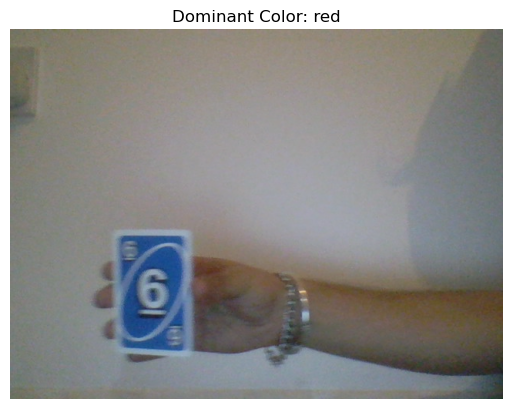

In [84]:
def display_image_with_color(image_path):
    color = detect_hsv_color(image_path)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying
    plt.imshow(img)
    plt.title(f"Dominant Color: {color}")
    plt.axis('off')
    plt.show()

# Example of using the function
image_path = 'D:/UNO_CARD/6/346.png'
display_image_with_color(image_path)